In [1]:
import os
from sys import path
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.randomize_f as myrand
import myfuncions.core_shell_f as cs
import myfuncions.tools_f as tools
import subprocess as sbp
import myfuncions.graphs_f as gf
name = 'probe.xyz'

In [2]:


coords = cs.cubeShell(14,2.775,'fcc')
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
atpos, eleList = tools.spherical_cut(atpos, eleList, 25)
atpos, eleList, mode = myrand.cambiar_elementos_prob(atpos,{'Pt':0.28, 'Pd':0.45, 'Co':0.27})
tools.show_percent(atpos, eleList)
#atpos = myrand.remove_at_powrad(atpos,0.20,25,1)


tools.wXYZ(atpos, name)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name])

#gf.dump_graficar_atpr(atpos,'Pt',1.4)

Corta esfericamente al atpos
Cambia elementos prob a atpos
atomos totales : 4321
Pd : 45.19787086322611 %, 1953
Co : 28.48877574635501 %, 1231
Pt : 26.313353390418886 %, 1137


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'probe.xyz'], returncode=0)

In [3]:
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos,eleList,name)

probe.ini


In [23]:
tf = 600

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 {tf} 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin {tf} {tf} 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')

0

In [24]:
datpos, deleList = tools.leer_xyz(f'{name[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name[:-4]}_d2.xyz')
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', f'{name[:-4]}_d2.xyz'])

Cambia etiquetas a "atpos"
jala
atomos totales : 4321
Pt : 26.313353390418886 %, 1137
Pd : 45.19787086322611 %, 1953
Co : 28.48877574635501 %, 1231


CompletedProcess(args=['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', 'probe_d2.xyz'], returncode=0)

In [38]:
import PDF.runner as pdf
pdf.run_pdf(f'{name[:-4]}_d2.xyz', dir_actual, 2600,0.02)

c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\26_de_abril\FittingM1_powdist_maxin

   8.49199966E-02  -7.41614008      -22.9489994              46   211761.000    
  -3.87325001      -3.78364992      -22.5895996              27   211761.000    
  0.155880004      -3.87427998      -23.0517006              46   211761.000    
        4321  atomos      9333360  pares 
 Rango de distancias    2.27887797     -   49.9826469    
 Distancias promedio    25.0144672    
 Factor de normalizacion    457686.469    



In [26]:
from V2.pdf import getStr, histogram, calcPDF

atpos, size = getStr('probe_d2.xyz')
dx = 0.01
hist, dmean = histogram(atpos,size)
calcPDF(hist,name)
#os.system('mv pdf.dat '+ name[:-4] +'-pdf.dat')



File  probe_d2.xyz
4321  Atoms,   9333360.0  Pairs
Distance range  2.2789 --  49.9826
Mean pair distance  25.00289803047907
Normalization factor  458467.5305707262
Scaling factor  8.48738720336702


In [3]:
####### Tomado del código de python para hacer el pdf ¿para que sirve cada cosa?
#    a = 2.72
#	b = 2.198
#	b = 0.35
#	lh = len(h)
#	hs = smooth(h,10)
#	hs2 = smooth(hs1,5)
#	hs = smooth(hs2,5)
#	bs1 = smooth(h,100)
#	bs2 = smooth(bs1,100)
#	gr = np.array(hs) -np.array(bs2)
#	k = int(a /dx) -1
#	y = h[k] -bs2[k]
#	c = b /y
#	c = b /gr[k] 
#	gr *= c

a es 2.66, k es 132, y el factor de escala es 3.4961542303466184
Para el modelo de python: La suma de los cuadrados de los residuos es: 3.5041 , ECM = 0.03671156167823382
Para el modelo de fortran: La suma de los cuadrados de los residuos es: 1.6873, ECM = 0.025474581296490623


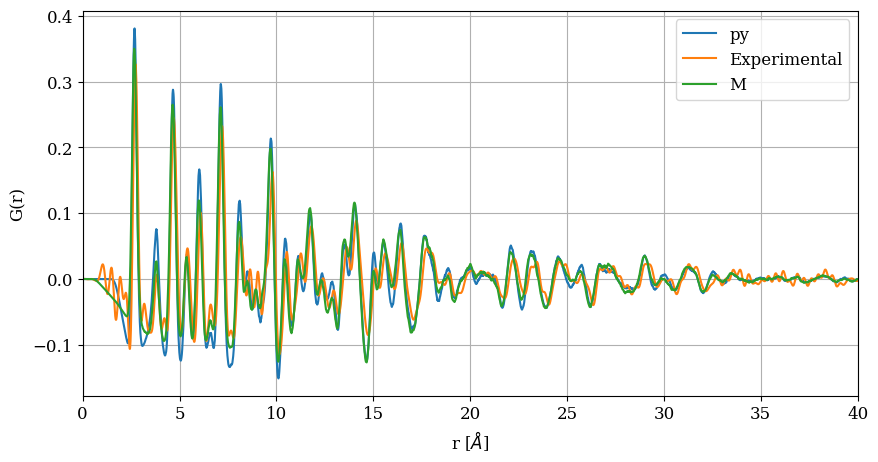

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_M= pd.read_csv(f'{name[:-4]}_d2.txt', sep='\s+')
df_exp = pd.read_csv('../Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
df_py = pd.read_csv('probe-pdf.dat', sep='\s+')
df_exp = df_exp.replace('--',np.nan).dropna()
df_exp = df_exp.astype(float)
df_py = df_py.astype(float)

dx = 0.02
a = float(df_M[df_M['G(r)']== max(df_M['G(r)'])]['#r(A)'].iloc[0])
b = 0.35 #### Al parecer este es el originario de todo lo que yo estaba haciendo
k = int(a /dx) -1
c = b/(float(df_M['G(r)'][k]))
print(f'a es {a}, k es {k}, y el factor de escala es {c}')

df_M['G(r)'] *= c

#print(df_py['PDF'].to_string())
# Hace la resta de cuadrados
rest_df_exp = df_exp["G(r)"].iloc[1::2].dropna().reset_index(drop=True)
rest1 = rest_df_exp - df_M["G(r)"]
ssr1 = np.sum(rest1**2)
rest2 = df_exp["G(r)"] - df_py["PDF"]
ssr2 = np.sum(rest2**2)


# Imprimir el resultado
print(f"Para el modelo de python: La suma de los cuadrados de los residuos es: {ssr2:.4f} , ECM = {np.sqrt(ssr2/2600)}")
print(f"Para el modelo de fortran: La suma de los cuadrados de los residuos es: {ssr1:.4f}, ECM = {np.sqrt(ssr1/2600)}")

fig, ax =plt.subplots(figsize=(10,5))
ax.plot(df_py['#r(A)'], df_py['PDF'], label='py')
ax.plot(df_exp['r'],df_exp['G(r)'], label = 'Experimental')
ax.plot(df_M['#r(A)'], df_M['G(r)'], label='M')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,40])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')   
plt.rcParams['font.family']='serif'
plt.show()


### Si al parecer el factor de escala terminó ajustando mis resultados

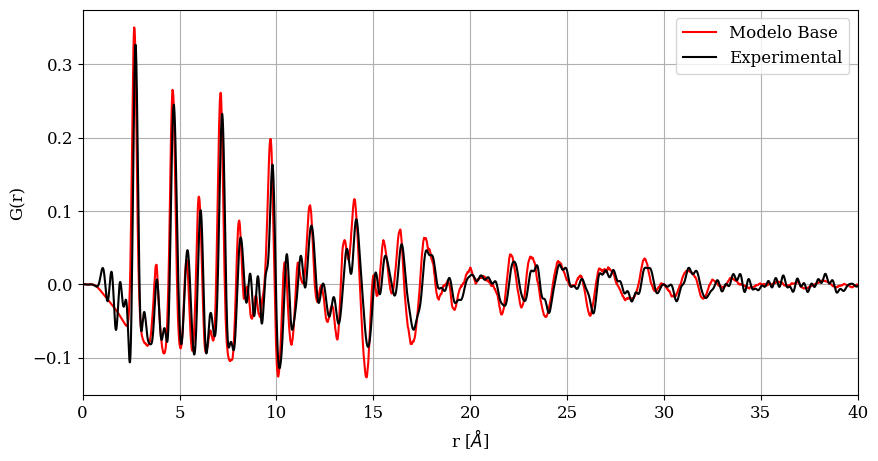

In [5]:
fig, ax =plt.subplots(figsize=(10,5))
ax.plot(df_M['#r(A)'], df_M['G(r)'], label='Modelo Base', color='red')
ax.plot(df_exp['r'],df_exp['G(r)'], label = 'Experimental', color='black')


ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,40])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

### Análisis
Tan solo al escalar el rdf de fortran he reducido el error a la mitad

Bajaré la temperatura a 500 o 450 o 400 K, esperando un corrimiento a la izquierda.

Trataré de corregir este corrimiento aplicando un modelo tipo rand_rad_M0 o M1 depende el caso (Cobalto en el exterior), eso me ocasionará una intensificación de los 3 primeros picos máximos.

En su caso, haré de nuevo el modelo bajando solo un poco la temperatura, ganando definición en el extremo derecho del gráfico (creo).

Al final meteré no más de 5% de vacancias en varias distribuciones, la primera distribución será en la frontera con todas las vacancias en el exterior, y la segunda será tendiendo gradualmente al centro.